### Getting started 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline

In [2]:
#reading dataset 

data = pd.read_csv('../Data/NFL_Play_by_Play_2009-2018(v5).csv')

/Users/ulrikeanklam/opt/anaconda3/envs/matrix/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#splitting dataset into train and test
train , test = data.loc[data['game_id'] < 2016090800] , data.loc[data['game_id'] >= 2016090800]

In [4]:
#exporting train and test csv's 

#train = train.to_csv('Data/nfl_train.csv', index = False)

In [5]:
#test = test.to_csv('Data/nfl_test.csv', index = False)

### Data Cleaning and Data Exploration

In [6]:
pd.options.display.max_columns = None 
pd.options.display.max_rows = None
train.isnull().sum()

play_id                                      0
game_id                                      0
home_team                                    0
away_team                                    0
posteam                                   8726
posteam_type                              8484
defteam                                   8484
side_of_field                              393
yardline_100                              8613
game_date                                    0
quarter_seconds_remaining                   83
half_seconds_remaining                      83
game_seconds_remaining                      83
game_half                                    0
quarter_end                                  0
drive                                        0
sp                                           0
qtr                                          0
down                                     47069
goal_to_go                                8371
time                                        83
yrdln        

In [7]:
missing_values = train.isnull().sum()

In [8]:
mv_ratio = missing_values[missing_values.gt(0)]/len(train)

In [9]:
list_mv_50 = mv_ratio.loc[mv_ratio.gt(0.5)].index

In [10]:
# dropping the columns with more than 80% missing values 

train_01 = train.drop( columns = list_mv_50).copy()

In [11]:
train.shape

(316538, 255)

In [12]:
train_01.shape

(316538, 150)

In [13]:
train_01.head(100)

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,return_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,900.0,1800.0,3600.0,Half1,0,1,0,1,NaN,0.0,15:00,TEN 30,0,0,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,kickoff,0.0,0,0,0.0,0,0,0,3,3,0.0,3.0,3.0,0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.000000,0.0,0.323526,2.014474,2.014474,-2.014474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,893.0,1793.0,3593.0,Half1,0,1,0,1,1.0,0.0,14:53,PIT 42,10,5,(14:53) B.Roethlisberger pass short left to H....,pass,5.0,0,0,1.0,0,0,0,3,3,0.0,3.0,3.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.000000,0.0,2.338000,0.077907,2.092381,-2.092381,0.000000,0.000000,0.077907,-0.077907,-0.938735,1.016643,-0.938735,0.938735,1.016643,-1.016643,-0.938735,0.938735,1.016643,-1.016643,0.546433,0.453567,0.546433,0.453567,0.004655,0.551088,0.448912,0.000000,0.000000,0.004655,-0.004655,-0.028383,0.033038,-0.028383,0.028383,0.033038,-0.033038,-0.028383,0.028383,0.033038,-0.033038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

#### features:

total_home_score

total_away_score

home_wp

away_wp

play_type

yards gained 


In [14]:
mv_01 = train_01.isnull().sum()

In [15]:
list_cols = mv_01.loc[mv_01.gt(0)].index

In [16]:
#filling all NaN with 0 
for col in list_cols:
    train_01[col] = train_01[col].fillna(0)

In [80]:
# converting date to datetime dtype
train_01['game_date'] = pd.to_datetime(train_01['game_date'], format = '%Y-%m-%d' )

In [18]:
#train_01.corr().gt(0.6)

## Data Preprocessing

### Feature creation

#### Hypothesis: yards gained by running play or passing play impacts outcome of the game? 
Looking at the yards gained per running play vs. passing play 
- number of running plays vs passing plays
- percentage running plays vs passing plays 
- is there a difference in home and away team?
- average over all years and games, teams 
- percentages per team per game 
- compare averages of each team, per game with the general average 


In [19]:
# splitting DF into data of home team and data of away team
home = train_01.loc[train_01['posteam_type'] == 'home']
away = train_01.loc[train_01['posteam_type'] == 'away']

# filtering for running plays and passing plays 
away = away[['game_id','game_date','play_id','play_type','yards_gained']]
away_run = away.loc[away['play_type'] == 'run']
away_pass = away.loc[away['play_type'] == 'pass']

home = home[['game_id','game_date','play_id','play_type','yards_gained']]
home_run = home.loc[home['play_type'] == 'run']
home_pass = home.loc[home['play_type'] == 'pass']

In [21]:
# aggregating the yards gained per game for all running plays of the away team 
away_run_sum = away_run.groupby(['game_date', 'game_id'], as_index = False).sum()
away_run_sum

,game_date,game_id,play_id,yards_gained
0,2009-09-10,2009091000,49568,86.0
1,2009-09-13,2009091300,38952,96.0
2,2009-09-13,2009091301,30068,29.0
3,2009-09-13,2009091302,74682,186.0
4,2009-09-13,2009091303,36600,75.0
5,2009-09-13,2009091304,69721,226.0
6,2009-09-13,2009091305,88536,196.0
7,2009-09-13,2009091306,53303,114.0
8,2009-09-13,2009091307,31488,34.0
9,2009-09-13,2009091308,40418,118.0


In [22]:
# aggregating the yards gained per game for all passing plays of the away team 
away_pass_sum = away_pass.groupby(['game_date', 'game_id'], as_index = False).sum()

In [23]:
# aggregating the yards gained per game for all running plays of the home team 
home_run_sum = home_run.groupby(['game_date', 'game_id'], as_index = False).sum()

In [24]:
# aggregating the yards gained per game for all running plays of the away team 
home_pass_sum = home_pass.groupby(['game_date', 'game_id'], as_index = False).sum()

### Calculating the percentage of running plays and passing plays in general

Count of all running plays/ total count of all plays = percentage of running plays 

Count of all passing plays/ total count of all plays = percentage of passing plays 


In [35]:
total_running_plays = away_run.shape[0] + home_run.shape[0]
total_running_plays

94373

In [36]:
total_passing_plays = away_pass.shape[0] + home_pass.shape[0]
total_passing_plays

131228

In [37]:
total_plays = total_running_plays + total_passing_plays
total_plays

225601

In [39]:
perc_run_plays = total_running_plays / total_plays
perc_run_plays

0.41831818121373576

In [40]:
perc_pass_plays = total_passing_plays / total_plays
perc_pass_plays

0.5816818187862642

#### The average game (in the given time frame from 2009 to 2016) consists of 41.83% running plays and 58.17% of passing plays

### Calculating the percentages for the home team and the away team

In [41]:
total_run_away = away_run.shape[0]

In [42]:
total_pass_away = away_pass.shape[0]

In [43]:
total_run_home = home_run.shape[0]

In [44]:
total_pass_home = home_pass.shape[0]

In [45]:
total_away_plays = total_run_away + total_pass_away

In [55]:
total_home_plays = total_run_home + total_pass_home
total_home_plays

113236

In [48]:
perc_run_away = total_run_away/ total_away_plays
perc_run_away

0.41322475859920793

In [51]:
perc_pass_away = total_pass_away/ total_away_plays
perc_pass_away

0.5867752414007921

In [50]:
perc_pass_home = total_pass_away/ total_home_plays
perc_pass_home

0.5822618248613515

In [53]:
perc_run_home = total_run_away/ total_home_plays
perc_run_home

0.41004627503620755

No significant difference!

### Calculating the average yards gained per play (running vs passing)

SUM( yards_gained by running play) / total plays

SUM( yards_gained by passing play) / total plays

In [56]:
# summing the yards gained by running of the away team and home team
sum_yards_running = sum(away_run_sum.yards_gained) + sum(home_run_sum.yards_gained)
sum_yards_running

410219.0

In [57]:
# summing the yards gained by passing of the away team and home team
sum_yards_passing = sum(away_pass_sum.yards_gained) + sum(home_pass_sum.yards_gained)
sum_yards_passing

826994.0

In [58]:
# average yards gained per running play 

avg_yards_running = sum_yards_running / total_plays
avg_yards_running


1.8183385711942766

In [60]:
yards_run = sum_yards_running/ total_running_plays
yards_run

4.346783507994871

In [59]:
# average yards gained per passing play 

avg_yards_passing = sum_yards_passing / total_plays
avg_yards_passing

3.665737297263753

In [61]:
yards_pass = sum_yards_passing/ total_passing_plays
yards_pass

6.301962995702136

##### average yards by passing game: 6.3
##### average yards by running game: 4.4

I expected the yards gained by passing to be much higher than the yards gained by running. Maybe the number of passing games that are incomplete or result in a loss of yards (negative yards gained) overweigh the succesful/completed passes. 

### Describtive statistics of 'yards_gained' column

In [62]:
home_run['yards_gained'].describe()

count    47941.000000
mean         4.395132
std          6.526462
min        -18.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         97.000000
Name: yards_gained, dtype: float64

In [63]:
away_run['yards_gained'].describe()

count    46432.000000
mean         4.296864
std          6.363918
min        -27.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         91.000000
Name: yards_gained, dtype: float64

In [64]:
home_pass['yards_gained'].describe()

count    65295.000000
mean         6.442913
std         10.219999
min        -28.000000
25%          0.000000
50%          4.000000
75%         11.000000
max         95.000000
Name: yards_gained, dtype: float64

In [65]:
away_pass['yards_gained'].describe()

count    65933.000000
mean         6.162377
std         10.136692
min        -38.000000
25%          0.000000
50%          3.000000
75%         10.000000
max         99.000000
Name: yards_gained, dtype: float64

(array([4.0000e+00, 2.0000e+01, 1.0900e+02, 1.3520e+03, 1.3328e+04,
        1.6706e+04, 9.4700e+03, 3.5780e+03, 1.5630e+03, 6.9300e+02,
        3.4300e+02, 1.7100e+02, 1.5300e+02, 1.2800e+02, 8.1000e+01,
        5.0000e+01, 3.8000e+01, 2.8000e+01, 2.5000e+01, 1.9000e+01,
        2.0000e+01, 1.2000e+01, 1.0000e+01, 7.0000e+00, 7.0000e+00,
        1.0000e+01, 3.0000e+00, 6.0000e+00, 5.0000e+00, 2.0000e+00]),
 array([-18.        , -14.16666667, -10.33333333,  -6.5       ,
         -2.66666667,   1.16666667,   5.        ,   8.83333333,
         12.66666667,  16.5       ,  20.33333333,  24.16666667,
         28.        ,  31.83333333,  35.66666667,  39.5       ,
         43.33333333,  47.16666667,  51.        ,  54.83333333,
         58.66666667,  62.5       ,  66.33333333,  70.16666667,
         74.        ,  77.83333333,  81.66666667,  85.5       ,
         89.33333333,  93.16666667,  97.        ]),
 <a list of 30 Patch objects>)

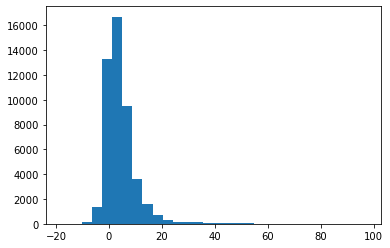

In [78]:
plt.hist(home_run['yards_gained'], bins = 30)

(array([1.0000e+00, 0.0000e+00, 3.0000e+00, 1.1000e+01, 6.4000e+01,
        7.2400e+02, 8.2260e+03, 2.1685e+04, 9.2360e+03, 3.3780e+03,
        1.3830e+03, 6.6500e+02, 3.4700e+02, 2.1300e+02, 9.4000e+01,
        9.6000e+01, 6.4000e+01, 5.4000e+01, 4.1000e+01, 3.9000e+01,
        3.0000e+01, 1.2000e+01, 1.8000e+01, 1.1000e+01, 1.1000e+01,
        4.0000e+00, 7.0000e+00, 1.3000e+01, 1.0000e+00, 1.0000e+00]),
 array([-27.        , -23.06666667, -19.13333333, -15.2       ,
        -11.26666667,  -7.33333333,  -3.4       ,   0.53333333,
          4.46666667,   8.4       ,  12.33333333,  16.26666667,
         20.2       ,  24.13333333,  28.06666667,  32.        ,
         35.93333333,  39.86666667,  43.8       ,  47.73333333,
         51.66666667,  55.6       ,  59.53333333,  63.46666667,
         67.4       ,  71.33333333,  75.26666667,  79.2       ,
         83.13333333,  87.06666667,  91.        ]),
 <a list of 30 Patch objects>)

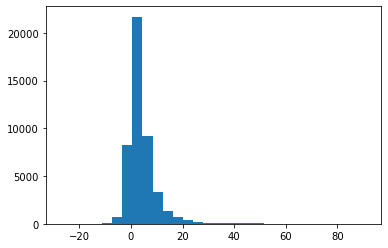

In [77]:
plt.hist(away_run['yards_gained'],bins = 30)

(array([4.0000e+00, 1.1000e+01, 4.1000e+01, 2.1500e+02, 1.2970e+03,
        1.8050e+03, 2.5170e+04, 5.9010e+03, 1.0297e+04, 7.6940e+03,
        5.7010e+03, 2.5670e+03, 1.5360e+03, 8.9000e+02, 5.7200e+02,
        4.1700e+02, 2.7400e+02, 2.2300e+02, 1.8900e+02, 1.4000e+02,
        1.0100e+02, 7.3000e+01, 4.6000e+01, 4.0000e+01, 3.1000e+01,
        2.2000e+01, 2.1000e+01, 6.0000e+00, 8.0000e+00, 3.0000e+00]),
 array([-28. , -23.9, -19.8, -15.7, -11.6,  -7.5,  -3.4,   0.7,   4.8,
          8.9,  13. ,  17.1,  21.2,  25.3,  29.4,  33.5,  37.6,  41.7,
         45.8,  49.9,  54. ,  58.1,  62.2,  66.3,  70.4,  74.5,  78.6,
         82.7,  86.8,  90.9,  95. ]),
 <a list of 30 Patch objects>)

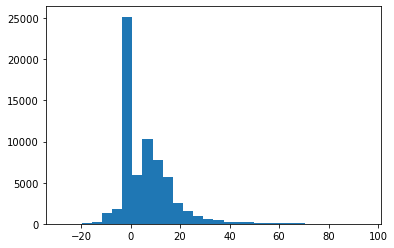

In [76]:
plt.hist(home_pass['yards_gained'], bins = 30)

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 1.4000e+01, 3.6000e+01,
        3.8700e+02, 1.9050e+03, 2.2080e+03, 2.8934e+04, 9.9600e+03,
        1.0197e+04, 4.6390e+03, 3.3200e+03, 1.4570e+03, 1.0090e+03,
        5.3900e+02, 3.3000e+02, 3.2100e+02, 1.6300e+02, 1.4700e+02,
        8.6000e+01, 8.0000e+01, 5.6000e+01, 3.3000e+01, 3.4000e+01,
        3.9000e+01, 2.1000e+01, 6.0000e+00, 6.0000e+00, 4.0000e+00]),
 array([-38.        , -33.43333333, -28.86666667, -24.3       ,
        -19.73333333, -15.16666667, -10.6       ,  -6.03333333,
         -1.46666667,   3.1       ,   7.66666667,  12.23333333,
         16.8       ,  21.36666667,  25.93333333,  30.5       ,
         35.06666667,  39.63333333,  44.2       ,  48.76666667,
         53.33333333,  57.9       ,  62.46666667,  67.03333333,
         71.6       ,  76.16666667,  80.73333333,  85.3       ,
         89.86666667,  94.43333333,  99.        ]),
 <a list of 30 Patch objects>)

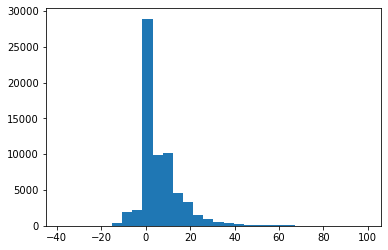

In [79]:
plt.hist(away_pass['yards_gained'],bins = 30)

### Risk Analysis

- What is the risk of having an unsuccesful play, a play with no gained yards (0 or less, lost yards)?  
- What is the chance of ball loss (fumble or interception) in general and by running or passing play? 

In [83]:
# adding the columns for Interception and Fumble to the subsetted DF's

home = train_01.loc[train_01['posteam_type'] == 'home']
away = train_01.loc[train_01['posteam_type'] == 'away']

# filtering for running plays and passing plays 
away = away[['game_id','game_date','play_id','play_type','yards_gained', 'interception', 'fumble']]
away_run = away.loc[away['play_type'] == 'run']
away_pass = away.loc[away['play_type'] == 'pass']

home = home[['game_id','game_date','play_id','play_type','yards_gained', 'interception', 'fumble']]
home_run = home.loc[home['play_type'] == 'run']
home_pass = home.loc[home['play_type'] == 'pass']

##### General risk

In [84]:
# filtering for all plays with 0 yards gained or yards lost (negative yards gained)
away_run_failed = away_run.loc[away_run['yards_gained'] <= 0]
away_pass_failed = away_pass.loc[away_pass['yards_gained'] <= 0]
home_run_failed = home_run.loc[home_run['yards_gained'] <= 0 ]
home_pass_failed = home_pass.loc[home_pass['yards_gained'] <= 0]

In [99]:
total_plays_failed = (away_run_failed.shape[0] 
                      + away_pass_failed.shape[0] 
                      + home_run_failed.shape[0] 
                      + home_pass_failed.shape[0])

In [101]:
general_risk = total_plays_failed / total_plays
general_risk

0.33893466784278437

##### Risk running play 

In [103]:
total_run_failed = away_run_failed.shape[0] + home_run_failed.shape[0] 

In [105]:
running_risk = total_run_failed / total_running_plays
running_risk

0.19316965657550358

##### Risk passing play

In [106]:
total_pass_failed = away_pass_failed.shape[0] + home_pass_failed.shape[0]

In [107]:
passing_risk = total_pass_failed / total_passing_plays
passing_risk

0.4437620020117658

#### There is a general risk of 33.89% of an unseccesful play. 

incomplete_pass	
interception  
fumble  
fumble_lost  
fumble_out_of_bounds  
fumble_forced  
fumble_not_forced  

In [87]:
train_01['fumble'].value_counts()

0.0    311834
1.0      4704
Name: fumble, dtype: int64

In [88]:
train_01['interception'].value_counts()

0.0    313143
1.0      3395
Name: interception, dtype: int64

In [91]:
train_01['fumble_lost'].value_counts()

0.0    314284
1.0      2254
Name: fumble_lost, dtype: int64